# NSDUH Tables

2023-2024 data from https://www.samhsa.gov/data/sites/default/files/reports/rpt56484/NSDUHDetailedTabs2024/NSDUHDetailedTabs2024/2024-nsduh-detailed-tables-sect5pe.htm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate

Code to download the HTML and pull out the tables is in `tables.py`

In [3]:
!ls data

2024-nsduh-detailed-tables-sect1pe.htm	table_1.69B.csv  table_6.39A.csv
2024-nsduh-detailed-tables-sect5pe.htm	table_1.6A.csv	 table_6.39B.csv
2024-nsduh-detailed-tables-sect6pe.htm	table_1.6B.csv	 table_6.3A.csv
2024-nsduh-detailed-tables-sect7pe.htm	table_1.70A.csv  table_6.3B.csv
table_1.100A.csv			table_1.70B.csv  table_6.40A.csv
table_1.100B.csv			table_1.71A.csv  table_6.40B.csv
table_1.101A.csv			table_1.71B.csv  table_6.41A.csv
table_1.101B.csv			table_1.72A.csv  table_6.41B.csv
table_1.102A.csv			table_1.72B.csv  table_6.42A.csv
table_1.102B.csv			table_1.73A.csv  table_6.42B.csv
table_1.103A.csv			table_1.73B.csv  table_6.43A.csv
table_1.103B.csv			table_1.74A.csv  table_6.43B.csv
table_1.104A.csv			table_1.74B.csv  table_6.44A.csv
table_1.104B.csv			table_1.75A.csv  table_6.44B.csv
table_1.105A.csv			table_1.75B.csv  table_6.45A.csv
table_1.105B.csv			table_1.76A.csv  table_6.45B.csv
table_1.106A.csv			table_1.76B.csv  table_6.46A.csv
table_1.106B.csv			table_1.77A.csv  tabl

In [40]:
import os

number = '7.3B'
filename = f'table_{number}.csv'
filename

'table_7.3B.csv'

In [41]:
from tables import load_table_mappings

filename_to_title, filename_to_number = load_table_mappings()


We can get a lot of information by parsing the table title

In [42]:
from tables import parse_table_title

title = filename_to_title[filename]

table_info = parse_table_title(title)
table_info

{'table_number': '7.3B',
 'full_description': 'Major Depressive Episode (MDE) or MDE with Severe Impairment in Past Year: Among People Aged 12 to 17; by Demographic Characteristics, Percentages, 2023 and 2024',
 'years': ('2023', '2024'),
 'measurement_type': 'Percentages',
 'time_period': 'Past Year',
 'population': '12 to 17',
 'breakdown_variables': 'Demographic Characteristics, Percentages,',
 'original_title': 'Table 7.3B - Major Depressive Episode (MDE) or MDE with Severe Impairment in Past Year: Among People Aged 12 to 17; by Demographic Characteristics, Percentages, 2023 and 2024'}

This function loads a sequence tables, cleans and extracts the parts we want, and concats them into a big table.

In [43]:
from tables import clean_table, add_diffs

df = pd.read_csv(f"data/{filename}", index_col=0)
df.head()

,"Had MDE1,2 (2023)","Had MDE1,2 (2024)","Had MDE with Severe Impairment1,3,4 (2023)","Had MDE with Severe Impairment1,3,4 (2024)"
Demographic Characteristic,,,,
TOTAL,18.1b,15.4,13.5b,11.3
AGE GROUP,NaN,NaN,NaN,NaN
12-13,11.9,10.1,8.2,7.4
14-15,19.1a,16.0,14.6a,11.7
16-17,22.7b,19.3,17.0a,14.3


In [44]:
df = clean_table(df)
df.head()

,"Had MDE1,2 (2023)","Had MDE1,2 (2024)","Had MDE with Severe Impairment1,3,4 (2023)","Had MDE with Severe Impairment1,3,4 (2024)"
Demographic Characteristic,,,,
TOTAL,18.1,15.4,13.5,11.3
AGE GROUP,NaN,NaN,NaN,NaN
12-13,11.9,10.1,8.2,7.4
14-15,19.1,16.0,14.6,11.7
16-17,22.7,19.3,17.0,14.3


In [45]:
df.columns

Index(['Had MDE1,2 (2023)', 'Had MDE1,2 (2024)',
       'Had MDE with Severe Impairment1,3,4 (2023)',
       'Had MDE with Severe Impairment1,3,4 (2024)'],
      dtype='object')

In [51]:
from tables import make_table

groups = ['Had MDE1,2']
make_table(df, groups=groups)

Had MDE1,2                   
                                 2023  2024 Change  Diff
Demographic Characteristic                              
Male                              9.4   8.4   -1.0   NaN
Female                           27.3  22.6   -4.7  14.2

In [16]:
from tables import prepare_table, compile_tables

In [17]:
from tables import plot_percentages

In [18]:
# clean_labels(table, label_prefix).drop(drop, level=0, errors='ignore')

### Mental illness in past year

In [52]:
groups = ['Had MDE1,2']
table_mde = prepare_table(3, section=7, groups=groups)
table_mde

Had MDE1,2                   
                                 2023  2024 Change  Diff
Demographic Characteristic                              
Male                              9.4   8.4   -1.0   NaN
Female                           27.3  22.6   -4.7  14.2

In [53]:
groups = ['Had MDE with Severe Impairment1,3,4']
table_mde2 = prepare_table(3, section=7, groups=groups)
table_mde2

Had MDE with Severe Impairment1,3,4               \
                                                          2023  2024 Change   
Demographic Characteristic                                                    
Male                                                       6.6   5.7   -0.9   
Female                                                    20.8  17.2   -3.6   

                                  
                            Diff  
Demographic Characteristic        
Male                         NaN  
Female                      11.5

In [54]:
groups = ['HAD SERIOUS THOUGHTS OF SUICIDE']

table_mde = prepare_table(35, section=7, groups=groups, years=[])
table_mde

,HAD SERIOUS THOUGHTS OF SUICIDE
Demographic Characteristic,
Male,7.9
Female,17.0


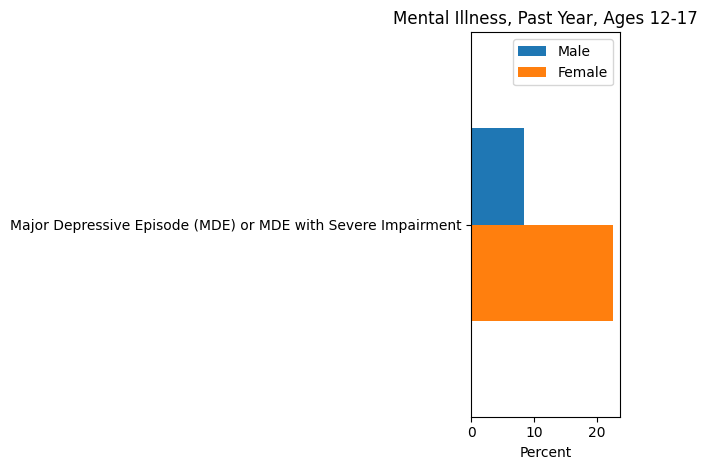

In [30]:
#plot_percentages(tables_past_year['Had MDE1,2'], title='Mental Illness, Past Year, Ages 12-17')
#plt.savefig('mental_illness_year_teen.png');

## Mental Health Treatment Last Year

In [13]:
tables = [8, 10, 12, 14, 16]
label_section = "Received Mental Health"
tables_past_year = compile_tables(tables, section=7, 
                                  groups=groups, label_section=label_section)

7.8B Past Year Received Mental Health Treatment
7.10B Past Year Received Mental Health Treatment as an Inpatient
7.12B Past Year Received Mental Health Treatment as an Outpatient
7.14B Past Year Received Mental Health Treatment through Prescription Medication
7.16B Past Year Received Mental Health Treatment through Telehealth


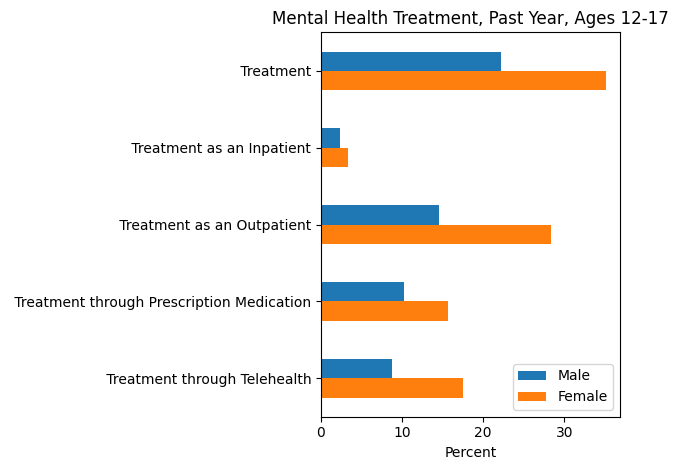

In [14]:
plot_percentages(tables_past_year['Aged 12-171'], title='Mental Health Treatment, Past Year, Ages 12-17')
plt.savefig('mental_illness_year_teen.png');

## Plot Changes

In [15]:
tables_past_year

Aged 12-171  \
                                                                            2023   
                                          Demographic Characteristic               
Treatment                                 Male                               NaN   
                                          Female                             NaN   
Treatment as an Inpatient                 Male                               NaN   
                                          Female                             NaN   
Treatment as an Outpatient                Male                               NaN   
                                          Female                             NaN   
Treatment through Prescription Medication Male                              10.9   
                                          Female                            17.1   
Treatment through Telehealth              Male                               9.8   
                                          Female                            18.8   

                                                                            \
                                                                      2024   
                                          Demographic Characteristic         
Treatment                                 Male                        22.2   
                                          Female                      35.1   
Treatment as an Inpatient                 Male                         2.3   
                                          Female                       3.4   
Treatment as an Outpatient                Male                        14.5   
                                          Female                      28.4   
Treatment through Prescription Medication Male                        10.2   
                                          Female                      15.7   
Treatment through Telehealth              Male                         8.8   
                                          Female                      17.5   

                                                                             \
                                                                     Change   
                                          Demographic Characteristic          
Treatment                                 Male                          NaN   
                                          Female                        NaN   
Treatment as an Inpatient                 Male                          NaN   
                                          Female                        NaN   
Treatment as an Outpatient                Male                          NaN   
                                          Female                        NaN   
Treatment through Prescription Medication Male                         -0.7   
                                          Female                       -1.4   
Treatment through Telehealth              Male                         -1.0   
                                          Female                       -1.3   

                                                                            
                                                                      Diff  
                                          Demographic Characteristic        
Treatment                                 Male                         NaN  
                                          Female                      12.9  
Treatment as an Inpatient                 Male                         NaN  
                                          Female                       1.1  
Treatment as an Outpatient                Male                         NaN  
                                          Female                      13.9  
Treatment through Prescription Medication Male                         NaN  
                                          Female                       5.5  
Treatment through Telehealth              Male                         NaN  
         

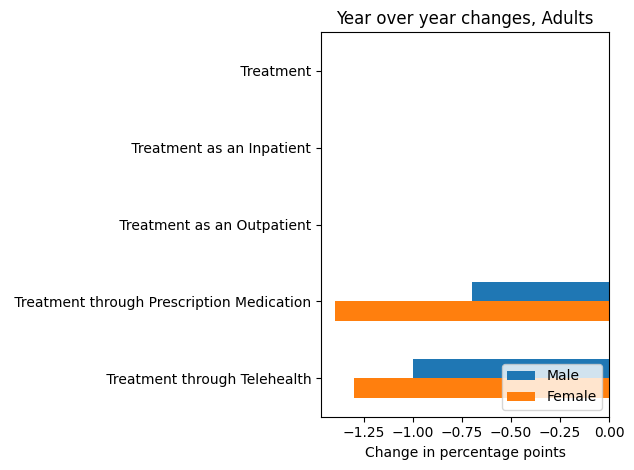

In [16]:
from tables import plot_changes

plot_changes(tables_past_year['Aged 12-171'], title='Year over year changes, Adults')
plt.savefig('mental_illness_changes_adult.png');